# Group 8 Members:
- CID: 01834400
- CID: 01839890
- CID: 01836113
- CID: 00940278

# 1. Importing Libraries 

In [1]:
# Data Manipulation Libaries
import pandas as pd
import numpy as np
from datetime import timedelta
import time
import scipy

def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

# Data Visualisation Libaries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# Feature Engineering Tools
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Model Scoring Tools
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# Model explainers
import lime
from lime.lime_tabular import LimeTabularExplainer
import eli5
from eli5.sklearn import PermutationImportance
import shap
from shap import TreeExplainer,KernelExplainer,LinearExplainer
shap.initjs()

/Users/lorenzmaresca/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/lorenzmaresca/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


# 2. Data Description 

### Source

Data has been downloaded from [link](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

1. It is an inpatient encounter (a hospital admission).
2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3. The length of stay was at least 1 day and at most 14 days.
4. Laboratory tests were performed during the encounter.
5. Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.


### Data Set Description

**Identification & Foreign Keys:**
- Encounter ID: Unique identifier of an encounter
- Admission source: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
- Admission type: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
- Discharge disposition: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
- Payer code: Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
- Patient number: Unique identifier of a patient

**Demographic Data:**
- Race Values: Caucasian, Asian, African American, Hispanic, and other
- Gender Values: male, female, and unknown/invalid
- Age: Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
- Weight: Weight in pounds

**Hospitalisation Data:**
- Time in hospital: Integer number of days between admission and discharge
- Number of lab procedures: Number of lab tests performed during the encounter
- Number of procedures: Numeric Number of procedures (other than lab tests) performed during the encounter
- Number of medications: Number of distinct generic names administered during the encounter
- Number of outpatient: visits Number of outpatient visits of the patient in the year preceding the encounter
- Number of emergency: visits Number of emergency visits of the patient in the year preceding the encounter
- Number of inpatient: visits Number of inpatient visits of the patient in the year preceding the encounter
- Number of diagnoses: Number of diagnoses entered to the system

**Diagnosis & Test Results Data:**
- Diagnosis 1: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
- Diagnosis 2: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
- Diagnosis 3: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
- Glucose serum test result: Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
- A1c test result: Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

**Drugs & Medication Data:**
- Change of medications: Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
- Diabetes medications: Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
- 24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

**Target Variable Data:**
- Readmitted Days to inpatient readmission: Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

# 3. Introduction to Dataset & Missing Values

In [2]:
# Loading data
df = pd.read_csv("data/diabetic_data.csv")

In [3]:
# Visualising the dataset
df.head().T

0          1  \
encounter_id                               2278392     149190   
patient_nbr                                8222157   55629189   
race                                     Caucasian  Caucasian   
gender                                      Female     Female   
age                                         [0-10)    [10-20)   
weight                                           ?          ?   
admission_type_id                                6          1   
discharge_disposition_id                        25          1   
admission_source_id                              1          7   
time_in_hospital                                 1          3   
payer_code                                       ?          ?   
medical_specialty         Pediatrics-Endocrinology          ?   
num_lab_procedures                              41         59   
num_procedures                                   0          0   
num_medications                                  1         18   
number_outpatient                                0          0   
number_emergency                                 0          0   
number_inpatient                                 0          0   
diag_1                                      250.83        276   
diag_2                                           ?     250.01   
diag_3                                           ?        255   
number_diagnoses                                 1          9   
max_glu_serum                                 None       None   
A1Cresult                                     None       None   
metformin                                       No         No   
repaglinide                                     No         No   
nateglinide                                     No         No   
chlorpropamide                                  No         No   
glimepiride                                     No         No   
acetohexamide                                   No         No   
glipizide                                       No         No   
glyburide                                       No         No   
tolbutamide                                     No         No   
pioglitazone                                    No         No   
rosiglitazone                                   No         No   
acarbose                                        No         No   
miglitol                                        No         No   
troglitazone                                    No         No   
tolazamide                                      No         No   
examide                                         No         No   
citoglipton                                     No         No   
insulin                                         No         Up   
glyburide-metformin                             No         No   
glipizide-metformin                             No         No   
glimepiride-pioglitazone                        No         No   
metformin-rosiglitazone                         No         No   
metformin-pioglitazone                          No         No   
change                                          No         Ch   
diabetesMed                                     No        Yes   
readmitted                                      NO        >30   

                                        2          3          4  
encounter_id                        64410     500364      16680  
patient_nbr                      86047875   82442376   42519267  
race                      AfricanAmerican  Caucasian  Caucasian  
gender                             Female       Male       Male  
age                               [20-30)    [30-40)    [40-50)  
weight                                  ?          ?          ?  
admission_type_id                       1          1          1  
discharge_disposition_id                1          1          1  
admission_source_id                     7          7          7  
time_in_hospital                        2          2          1  
payer_c

In [4]:
# shape of the dataset
print(df.shape)

# Nr of unique patients
pd.Series(df["patient_nbr"].unique()).count()

(101766, 50)


71518

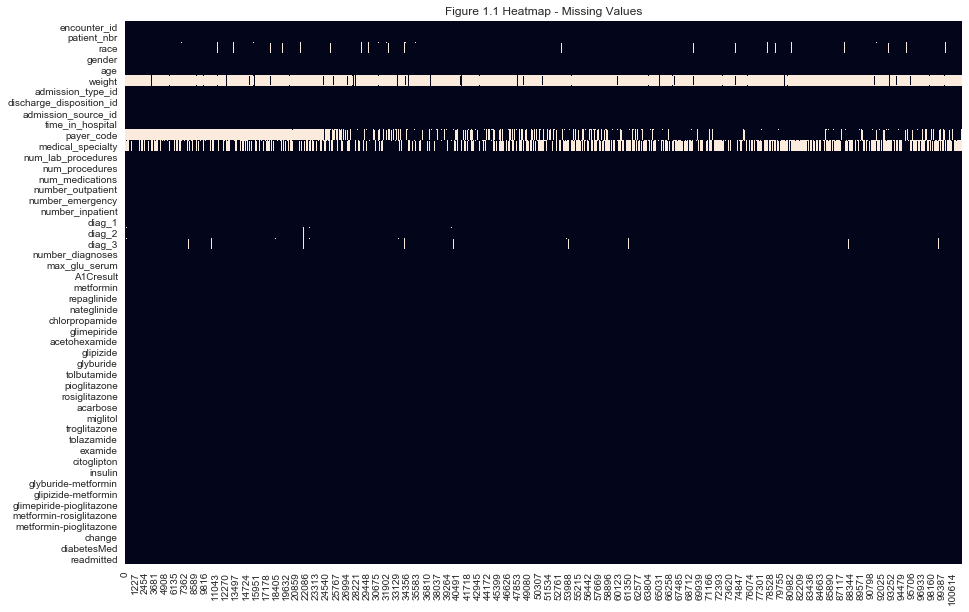

In [5]:
# Missing values are stored with "?"
df.replace('?',np.nan,inplace=True)

plt.figure(figsize=(15,10))
sns.heatmap(df.isnull().T, cbar=False)
plt.title("Figure 1.1 Heatmap - Missing Values")
plt.show()

In [6]:
# Displaying missing values for each column in percentage of the overall dataset
for col in df.columns:
    if df[col].dtype == object and col != "gender":
         print(col + " {:.2%}".format(round(df[col][df[col] == np.nan].count() / df.count()[0],2)))

    elif col == "gender":
         print(col + " {:.2%}".format(round(df['gender'][df['gender'] == 'Unknown/Invalid'].count() / df.count()[0],2)))

race 0.00%
gender 0.00%
age 0.00%
weight 0.00%
payer_code 0.00%
medical_specialty 0.00%
diag_1 0.00%
diag_2 0.00%
diag_3 0.00%
max_glu_serum 0.00%
A1Cresult 0.00%
metformin 0.00%
repaglinide 0.00%
nateglinide 0.00%
chlorpropamide 0.00%
glimepiride 0.00%
acetohexamide 0.00%
glipizide 0.00%
glyburide 0.00%
tolbutamide 0.00%
pioglitazone 0.00%
rosiglitazone 0.00%
acarbose 0.00%
miglitol 0.00%
troglitazone 0.00%
tolazamide 0.00%
examide 0.00%
citoglipton 0.00%
insulin 0.00%
glyburide-metformin 0.00%
glipizide-metformin 0.00%
glimepiride-pioglitazone 0.00%
metformin-rosiglitazone 0.00%
metformin-pioglitazone 0.00%
change 0.00%
diabetesMed 0.00%
readmitted 0.00%


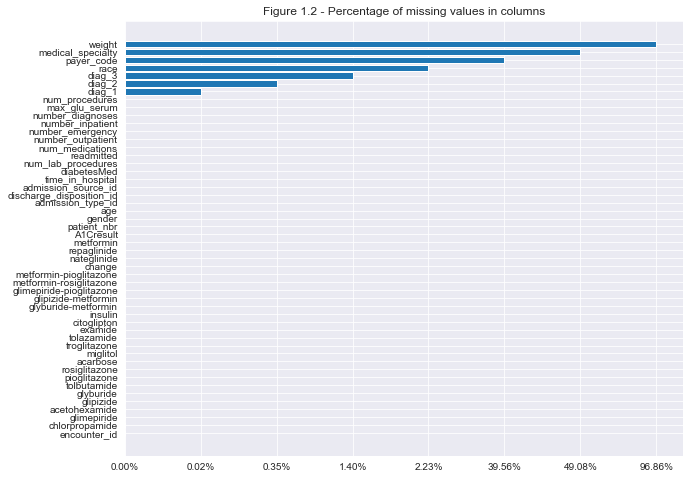

In [7]:
plt.figure(figsize=(10,8))
nans = pd.DataFrame({'column':df.columns ,'na_perc':df.isnull().sum()/len(df)})
nans["na_perc"] = nans["na_perc"].map("{:.2%}".format)
nans.sort_values('na_perc',inplace=True)
plt.barh(nans['column'],width=nans['na_perc'])
plt.title("Figure 1.2 - Percentage of missing values in columns")
plt.show()

We notice that weight, payer_code and medical_speciality all have a high set of missing values - respecivley 96.86%, 39.56%, and 49.08%.

Race and diagnosis results also have some missing values - altough minority of the data is comprised with it. Finally, gender seems to have 3 missing values.

For the continuation of the analysis, **we decided to exclude the full 3 columns: weight, payer_code and medical_speciality and also exclude the rows containing missing values for race, gender and diagnosis.**

We also decide to drop the entire column encounter_id, admission_type_id, discharge_disposition_id, and admission_source_id as it has no real meaning and is solely used as a foreign key for data storing purposes. We will still mantain patient_nbr as this holds an important information (ie whether the patient has already been hospitalised) 

In [8]:
# dropping Nan columns
df = df.drop(["weight","payer_code", "medical_specialty"], axis = 1)

# dropping id related columns - except for patient number id as we will tackle this later
df = df.drop(['encounter_id','admission_type_id','discharge_disposition_id','admission_source_id'],axis=1)

# dropping id Gender missing rows
df = df[df["gender"] != 'Unknown/Invalid']

# dropping rows with Nan's
df = df.dropna()

In [9]:
# shape of the dataset - after removal of missing values
print(df.shape)

(98052, 43)


# 4. Feature Engineering

### 4.1 Diagnosis 

Diagnosis follows the US states guidelines and is encoded via ICD-9-CM Codes (a complete list can be found [here](https://www.cdc.gov/nchs/icd/icd9cm.htm)). 

We will replace the encoded diagnosis values with the group of diseases they belong two: this will yield a total of 8 different groups, namley: Diabetes, Circulatory, Respiratory, Digestive, Genitourinary, Injury, Muscoloskeletal, and Neoplasms. Missing or incomplete data will be dealt with too. 

Some minor preprocessing will also be undertaken to transform the string values into float ones.

In [10]:
#Converting string values to floats
col_list = ['diag_1','diag_2','diag_3']
for col in col_list:
    df[col] = df[col].str.replace('E','-')
    df[col] = df[col].str.replace('V','-')
    condition = df[col].str.contains('250')
    df.loc[condition,col] = '250'

df[col_list] = df[col_list].astype(float)

Let us know group the diagnosis into the respective disease group

In [11]:
# diagnosis grouping
for col in col_list:
    df['temp']=np.nan
    
    condition = df[col]==250
    df.loc[condition,'temp']='Diabetes'
    
    condition = (df[col]>=390) & (df[col]<=458) | (df[col]==785)
    df.loc[condition,'temp']='Circulatory'
    
    condition = (df[col]>=460) & (df[col]<=519) | (df[col]==786)
    df.loc[condition,'temp']='Respiratory'
    
    condition = (df[col]>=520) & (df[col]<=579) | (df[col]==787)
    df.loc[condition,'temp']='Digestive'
    
    condition = (df[col]>=580) & (df[col]<=629) | (df[col]==788)
    df.loc[condition,'temp']='Genitourinary'
    
    condition = (df[col]>=800) & (df[col]<=999)
    df.loc[condition,'temp']='Injury'
    
    condition = (df[col]>=710) & (df[col]<=739)
    df.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (df[col]>=140) & (df[col]<=239)
    df.loc[condition,'temp']='Neoplasms'
    
    condition = df[col]==0
    df.loc[condition,col]='?'
    df['temp']=df['temp'].fillna('Others')
    
    condition = df['temp']=='0'
    df.loc[condition,'temp']=np.nan
    df[col]=df['temp']
    
    df.drop('temp',axis=1,inplace=True)
    
df = df.dropna()

#### Diagnosis 1 - Plot

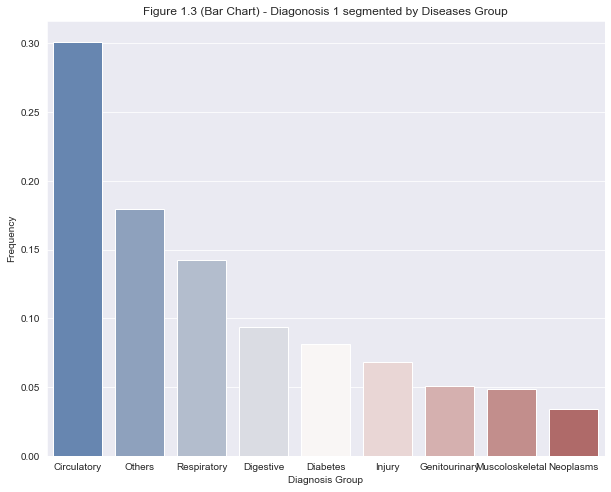

In [12]:
val_count = pd.DataFrame(df["diag_1"].value_counts(normalize = True)).reset_index()
val_count = val_count.rename(columns = {"index": "Diagnosis Group","diag_1": "Frequency"} )
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(data = val_count, x = "Diagnosis Group", y = "Frequency", palette="vlag")
plt.title("Figure 1.3 (Bar Chart) - Diagonosis 1 segmented by Diseases Group")
plt.show()

In [13]:
df["diag_1"] = pd.Categorical(df["diag_1"])

#### Diagnosis 2 - Plot

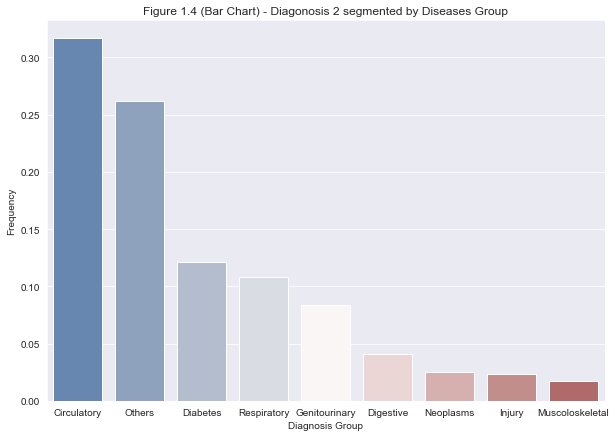

In [14]:
val_count = pd.DataFrame(df["diag_2"].value_counts(normalize = True)).reset_index()
val_count = val_count.rename(columns = {"index": "Diagnosis Group","diag_2": "Frequency"} )
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(data = val_count, x = "Diagnosis Group", y = "Frequency", palette="vlag")
plt.title("Figure 1.4 (Bar Chart) - Diagonosis 2 segmented by Diseases Group")
plt.show()

In [15]:
df["diag_2"] = pd.Categorical(df["diag_2"])

#### Diagnosis 3 - Plot

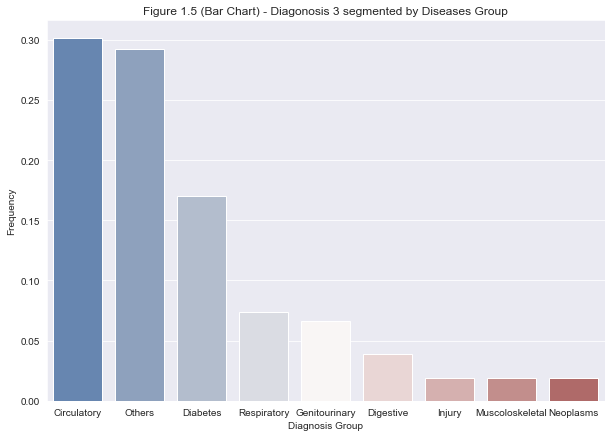

In [16]:
val_count = pd.DataFrame(df["diag_3"].value_counts(normalize = True)).reset_index()
val_count = val_count.rename(columns = {"index": "Diagnosis Group","diag_3": "Frequency"} )
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(data = val_count, x = "Diagnosis Group", y = "Frequency", palette="vlag")
plt.title("Figure 1.5 (Bar Chart) - Diagonosis 3 segmented by Diseases Group")
plt.show()

In [17]:
df["diag_3"] = pd.Categorical(df["diag_3"])

### 4.2 Age

Given the type of dataset collection age is stored across 10 different brackets, from [0-10] to [90-100]. Given that these are non numeric values we decided to encode them by following a simple logic: **we will attribute numbers from 1 to 10 - one for each interval**

In [18]:
pd.Series(pd.Categorical(df["age"]).codes).value_counts()

7    25305
6    21809
8    16702
5    16697
4     9265
3     3548
9     2717
2     1478
1      466
0       65
dtype: int64

In [19]:
df["age"].value_counts()

[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64

In [20]:
df["age"] = df["age"].str.replace("[", "")
df["age"] = df["age"].str.replace(")", "")

#### Age plot

In [21]:
df["age"] = pd.Categorical(df["age"])

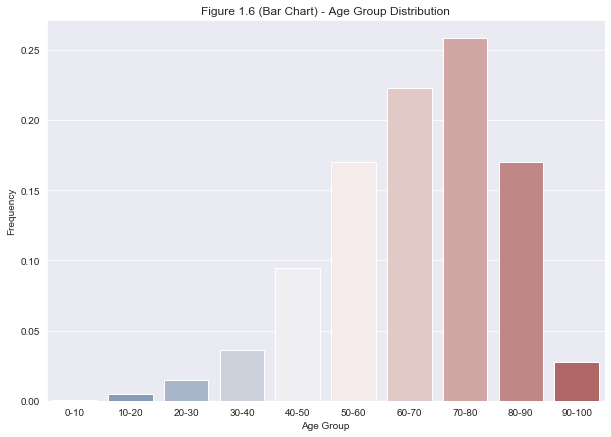

In [22]:
val_count = pd.DataFrame(df["age"].value_counts(normalize = True)).reset_index()
val_count = val_count.rename(columns = {"index": "Age Group","age": "Frequency"} )
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(data = val_count, x = "Age Group", y = "Frequency", palette="vlag")
plt.title("Figure 1.6 (Bar Chart) - Age Group Distribution")
plt.show()

### 4.3 Gloucose variables - A1C results & Glaucose serum test

We aim to replace the following categorical variables with a numerical encoding as we did for age.

In [23]:
df['max_glu_serum'].value_counts()

None    92844
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64

In [24]:
df['A1Cresult'].value_counts()

None    81859
>8       7631
Norm     4854
>7       3708
Name: A1Cresult, dtype: int64

#### Glaucose serum test plot

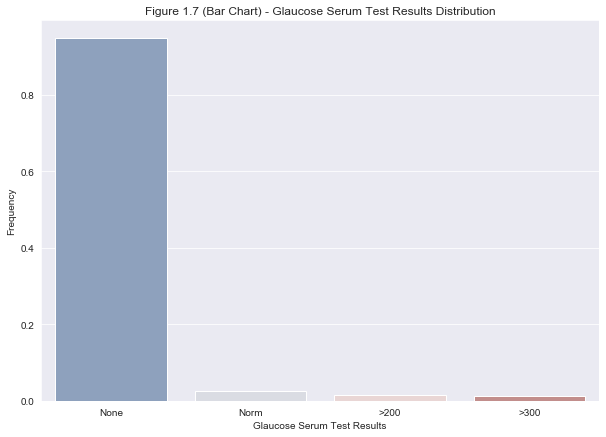

In [25]:
val_count = pd.DataFrame(df["max_glu_serum"].value_counts(normalize = True)).reset_index()
val_count = val_count.rename(columns = {"index": "Glaucose Serum Test Results","max_glu_serum": "Frequency"} )
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(data = val_count, x = "Glaucose Serum Test Results", y = "Frequency", palette="vlag")
plt.title("Figure 1.7 (Bar Chart) - Glaucose Serum Test Results Distribution")
plt.show()

In [26]:
df['max_glu_serum'] = pd.Categorical(df["max_glu_serum"])

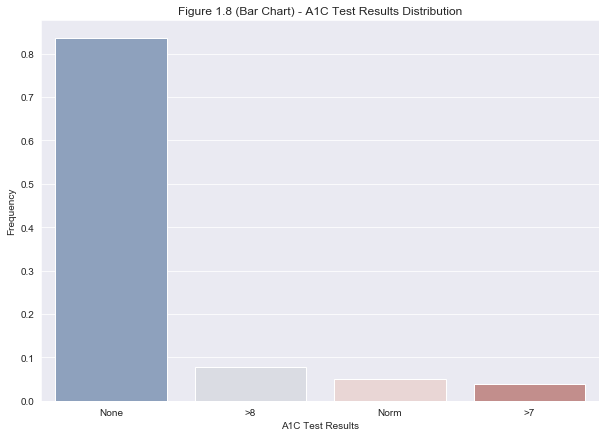

In [27]:
val_count = pd.DataFrame(df["A1Cresult"].value_counts(normalize = True)).reset_index()
val_count = val_count.rename(columns = {"index": "A1C Test Results","A1Cresult": "Frequency"} )
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(data = val_count, x = "A1C Test Results", y = "Frequency", palette="vlag")
plt.title("Figure 1.8 (Bar Chart) - A1C Test Results Distribution")
plt.show()

In [28]:
df['A1Cresult'] = pd.Categorical(df['A1Cresult'])

### 4.4 Medication Variables 
The dataset contains 23 features for 23 drugs (or drug pairs).Given that our aim is to understand whether a certain set of standardised policies can improve the early readmission rates of patients with a disease we will need to look at both, their current treatment (ie medication) and how many times that has changed over the course of the patients encounter. 

For the medication, we will simply create a set of dummy columns with encoding [0,1] aimed at capturing whether or not that patient was administered a certain drug. This will yield a total of 68 columns as the encoding for can take up to  4 distinct answers: Up, Down, Steady or No

Else for the changes in medication we will create a completley new column capturing the amount of times the medication of a patient has been changed during his/her encounter. The dataset contains 23 features for 23 drugs (or drug pairs)

In [29]:
med_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',"citoglipton", "examide", 'glimepiride', \
        'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', \
        'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', \
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [30]:
for col in med_cols:
    col_name = str(col) + 'temp'
    df[col_name] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

df['med_changes'] = 0
for col in med_cols:
    col_name = str(col) + "temp"
    df['med_changes'] = df['med_changes'] + df[col_name]
    del df[col_name]
    
df['med_changes'].value_counts()  

0    71309
1    25350
2     1281
3      107
4        5
Name: med_changes, dtype: int64

In [31]:
#Concatenate dummies with original dataset
df = pd.concat([df, pd.get_dummies(df[med_cols])], axis = 1)

#Drop medication columns
df = df.drop(med_cols,axis = 1)

### 4.5 Encoding Binary Variables - Gender, Change, and Diabetes Medication
Given that these variables only take two separate values, we decide to manually encode them with 1 and 0.

In [32]:
df['change'] = pd.Categorical(df['change'])
df['gender'] = pd.Categorical(df['gender'])
df['diabetesMed'] = pd.Categorical(df['diabetesMed'])

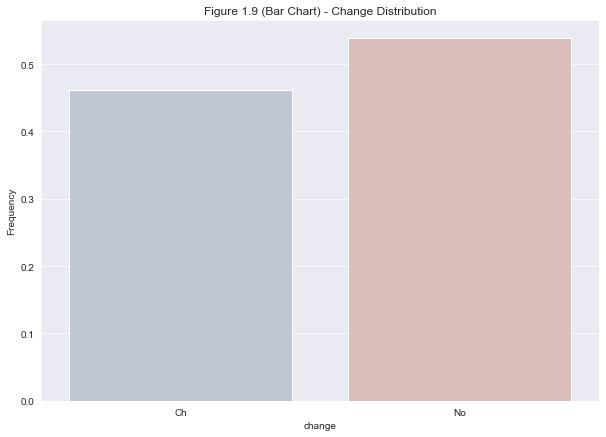

In [33]:
val_count = pd.DataFrame(df["change"].value_counts(normalize = True)).reset_index()
val_count = val_count.rename(columns = {"index": "change","change": "Frequency"} )
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(data = val_count, x = "change", y = "Frequency", palette="vlag")
plt.title("Figure 1.9 (Bar Chart) - Change Distribution")
plt.show()

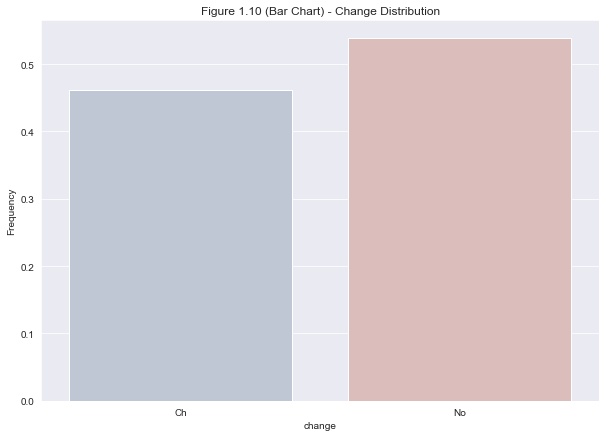

In [34]:
val_count = pd.DataFrame(df["change"].value_counts(normalize = True)).reset_index()
val_count = val_count.rename(columns = {"index": "change","change": "Frequency"} )
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(data = val_count, x = "change", y = "Frequency", palette="vlag")
plt.title("Figure 1.10 (Bar Chart) - Change Distribution")
plt.show()

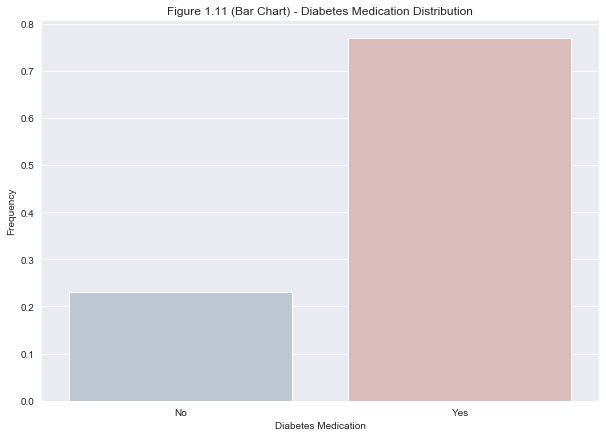

In [35]:
val_count = pd.DataFrame(df["diabetesMed"].value_counts(normalize = True)).reset_index()
val_count = val_count.rename(columns = {"index": "Diabetes Medication","diabetesMed": "Frequency"} )
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(data = val_count, x = "Diabetes Medication", y = "Frequency", palette="vlag")
plt.title("Figure 1.11 (Bar Chart) - Diabetes Medication Distribution")
plt.show()

### 4.6 Race
We proceed in a similar fashion to medication and decide to create a set of dummy columns for each race category

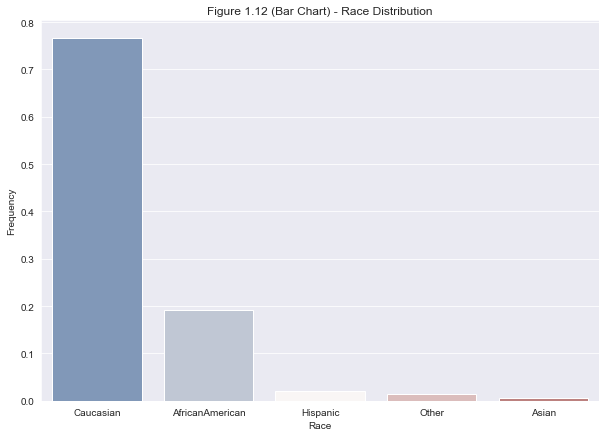

In [36]:
val_count = pd.DataFrame(df["race"].value_counts(normalize = True)).reset_index()
val_count = val_count.rename(columns = {"index": "Race","race": "Frequency"} )
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(data = val_count, x = "Race", y = "Frequency", palette="vlag")
plt.title("Figure 1.12 (Bar Chart) - Race Distribution")
plt.show()

In [37]:
#Concatenate dummies with original dataset
df = pd.concat([df, pd.get_dummies(df["race"])], axis = 1)

#Drop medication columns
df = df.drop(["race"],axis = 1)

### 4.7 Readmission - Target Variable

Given that we are interested specifically in early readmissions, as presented in our litterature review we will encode 1 for readmissions that have happened within the last 30 days after a patient has been discharged, and 0 if he has not been readmitted or if he has been readmitted after 30 days.

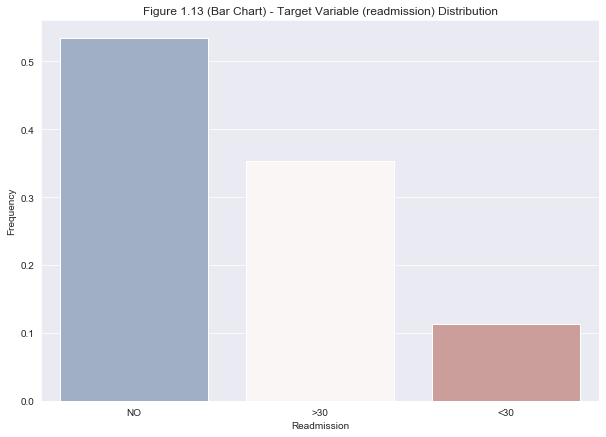

In [38]:
val_count = pd.DataFrame(df["readmitted"].value_counts(normalize = True)).reset_index()
val_count = val_count.rename(columns = {"index": "Readmission","readmitted": "Frequency"} )
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(data = val_count, x = "Readmission", y = "Frequency", palette="vlag")
plt.title("Figure 1.13 (Bar Chart) - Target Variable (readmission) Distribution")
plt.show()

In [39]:
df['readmitted'] = df['readmitted'].replace('>30', "No").replace('<30', "Yes").replace('NO', "No")
df['readmitted'] = pd.Categorical(df['readmitted'])

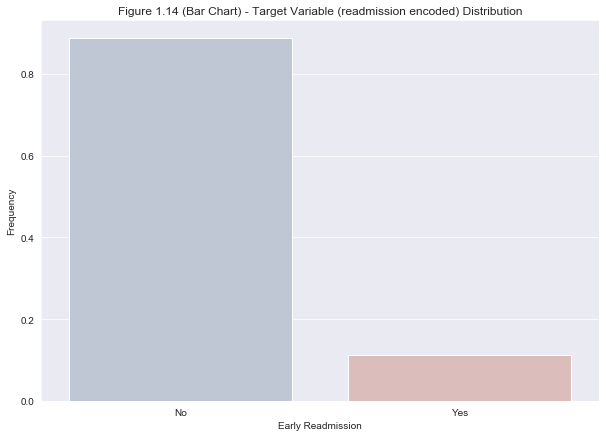

In [40]:
val_count = pd.DataFrame(df["readmitted"].value_counts(normalize = True)).reset_index()
val_count = val_count.rename(columns = {"index": "Early Readmission","readmitted": "Frequency"} )
fig, ax = plt.subplots(figsize = (10,7))
sns.barplot(data = val_count, x = "Early Readmission", y = "Frequency", palette="vlag")
plt.title("Figure 1.14 (Bar Chart) - Target Variable (readmission encoded) Distribution")
plt.show()

### 4.8 Patient Number
Some patients in the dataset had more than one encounter. Given the inherated nature of a second encouter is most likely driven by a first encounter we cannot count these as independent events. Yet, what we can do before getting rid of the duplicates is to crave out some information from the column.

However, after experimenting with the duplicates we found that last encounters had a strongly skewed distribution when looking at readmission (96/4 Readmissions vs No Readmissions) and thus, we decided to use first encounters of patients only without capturing any extra bit of information given that it could very well lead to a strong bias in our model - ie we might very well end up overfitting our model and leave little room for generlisation. 

In [41]:
df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df = df.drop(['patient_nbr'], axis = 1)
df.shape

(68629, 94)

In [42]:
display_all(df)

gender    age  time_in_hospital  num_lab_procedures  num_procedures  \
1       Female  10-20                 3                  59               0   
2       Female  20-30                 2                  11               5   
3         Male  30-40                 2                  44               1   
4         Male  40-50                 1                  51               0   
5         Male  50-60                 3                  31               6   
...        ...    ...               ...                 ...             ...   
101754  Female  70-80                 9                  50               2   
101755  Female  40-50                14                  73               6   
101756  Female  60-70                 2                  46               6   
101758  Female  80-90                 5                  76               1   
101765    Male  70-80                 6                  13               3   

        num_medications  number_outpatient  number_emergency  \
1                    18                  0                 0   
2                    13                  2                 0   
3                    16                  0                 0   
4                     8                  0                 0   
5                    16                  0                 0   
...                 ...                ...               ...   
101754               33                  0                 0   
101755               26                  0                 1   
101756               17                  1                 1   
101758               22                  0                 1   
101765                3                  0                 0   

        number_inpatient         diag_1         diag_2       diag_3  \
1                      0         Others       Diabetes       Others   
2                      1         Others       Diabetes       Others   
3                      0         Others       Diabetes  Circulatory   
4                      0      Neoplasms      Neoplasms     Diabetes   
5                      0    Circulatory    Circulatory     Diabetes   
...                  ...            ...            ...          ...   
101754                 0      Digestive      Digestive     Diabetes   
101755                 0  Genitourinary  Genitourinary  Respiratory   
101756                 1         Injury  Genitourinary  Circulatory   
101758                 0         Others         Others       Others   
101765                 0      Digestive      Digestive    Digestive   

        number_diagnoses max_glu_serum A1Cresult change diabetesMed  \
1                      9          None      None     Ch         Yes   
2                      6          None      None     No         Yes   
3                      7          None      None     Ch         Yes   
4                      5          None      None     Ch         Yes   
5                      9          None      None     No         Yes   
...                  ...           ...       ...    ...         ...   
101754                 9          None        >7     Ch         Yes   
101755                 9          None        >8     Ch         Yes   
101756                 9          None      None     No         Yes   
101758                 9          None      None     Ch         Yes   
101765                 9          None      None     No          No   

       readmitted  med_changes  metformin_Down  metformin_No  \
1              No            1               0             1   
2              No            0               0             1   
3              No            1               0             1   
4              No            0               0             1   
5              No            0               0             1   
...           ...          ...             ...           ...   
101754         No            1               0             1   
101755         No            1               0             1   
101756  

In [43]:
display_all(df.dtypes)

gender                             category
age                                category
time_in_hospital                      int64
num_lab_procedures                    int64
num_procedures                        int64
num_medications                       int64
number_outpatient                     int64
number_emergency                      int64
number_inpatient                      int64
diag_1                             category
diag_2                             category
diag_3                             category
number_diagnoses                      int64
max_glu_serum                      category
A1Cresult                          category
change                             category
diabetesMed                        category
readmitted                         category
med_changes                           int64
metformin_Down                        uint8
metformin_No                          uint8
metformin_Steady                      uint8
metformin_Up                    

# 5. Exploratory Data Analysis

#### 5.1 Distribution of hospitalisation days hued by Readmission (target variable)

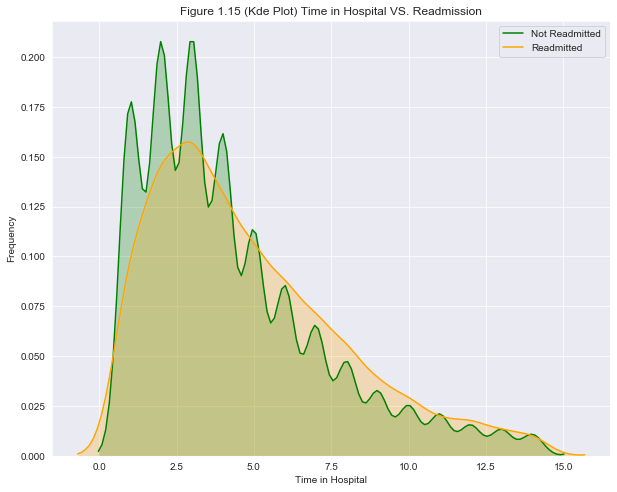

In [44]:
fig = plt.figure(figsize=(10,8))
ax=sns.kdeplot(df.loc[(df['readmitted'] == "No"),'time_in_hospital'] , color='green',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == "Yes"),'time_in_hospital'] , color='orange',shade=True, label='Readmitted',)
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Figure 1.15 (Kde Plot) Time in Hospital VS. Readmission')
plt.show()

#### 5.2 Distribution of undertaken procedures hued by Readmission (target variable)

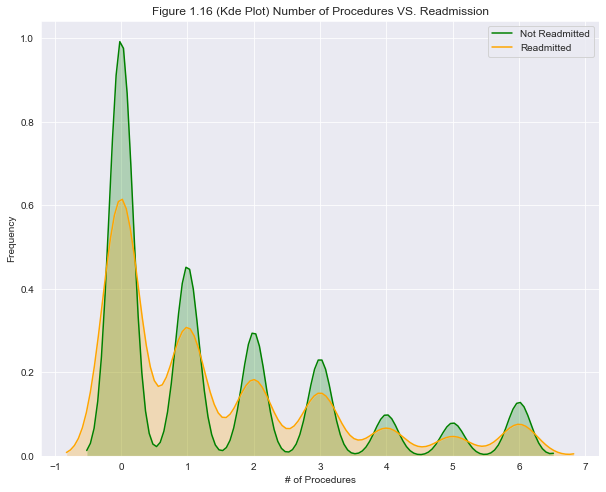

In [45]:
fig = plt.figure(figsize=(10,8))
ax=sns.kdeplot(df.loc[(df['readmitted'] == "No"),'num_procedures'] , color='green',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == "Yes"),'num_procedures'] , color='orange',shade=True, label='Readmitted',)
ax.set(xlabel='# of Procedures', ylabel='Frequency')
plt.title('Figure 1.16 (Kde Plot) Number of Procedures VS. Readmission')
plt.show()

#### 5.3 Distribution of undertaken laboratory procedures hued by Readmission (target variable)

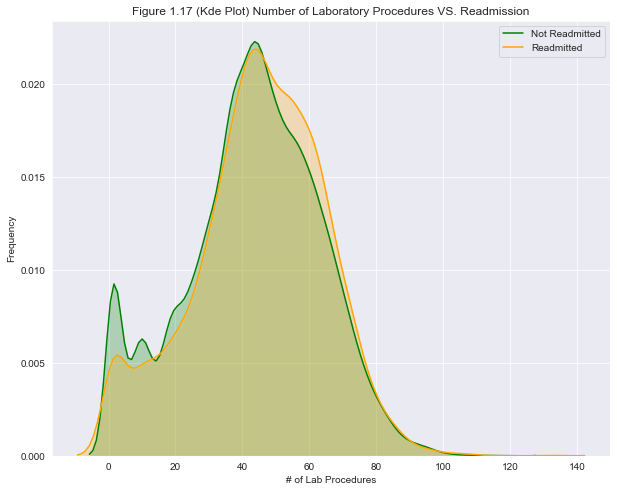

In [46]:
fig = plt.figure(figsize=(10,8))
ax=sns.kdeplot(df.loc[(df['readmitted'] == "No"),'num_lab_procedures'] , color='green',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == "Yes"),'num_lab_procedures'] , color='orange',shade=True, label='Readmitted',)
ax.set(xlabel='# of Lab Procedures', ylabel='Frequency')
plt.title('Figure 1.17 (Kde Plot) Number of Laboratory Procedures VS. Readmission')
plt.show()

#### 5.4 Distribution of medication amount by hued by Readmission (target variable)

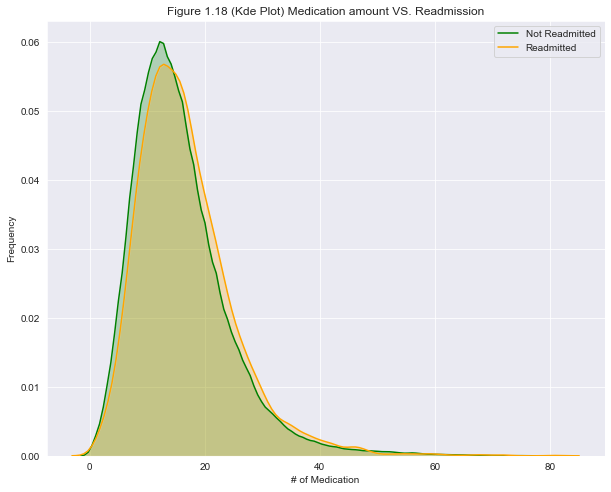

In [47]:
fig = plt.figure(figsize=(10,8))
ax=sns.kdeplot(df.loc[(df['readmitted'] == "No"),'num_medications'] , color='green',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == "Yes"),'num_medications'] , color='orange',shade=True, label='Readmitted',)
ax.set(xlabel='# of Medication', ylabel='Frequency')
plt.title('Figure 1.18 (Kde Plot) Medication amount VS. Readmission')
plt.show()

#### 5.5 Distribution of medication amount by hued by Readmission (target variable)¶

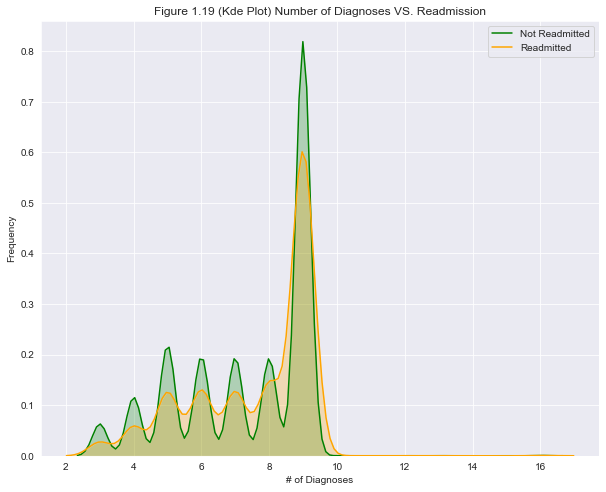

In [48]:
fig = plt.figure(figsize=(10,8))
ax=sns.kdeplot(df.loc[(df['readmitted'] == "No"),'number_diagnoses'] , color='green',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == "Yes"),'number_diagnoses'] , color='orange',shade=True, label='Readmitted',)
ax.set(xlabel='# of Diagnoses', ylabel='Frequency')
plt.title('Figure 1.19 (Kde Plot) Number of Diagnoses VS. Readmission')
plt.show()

#### 5.6 Hospitalisation Days Distribution vs Readmitted (segmented by Diagnosis)

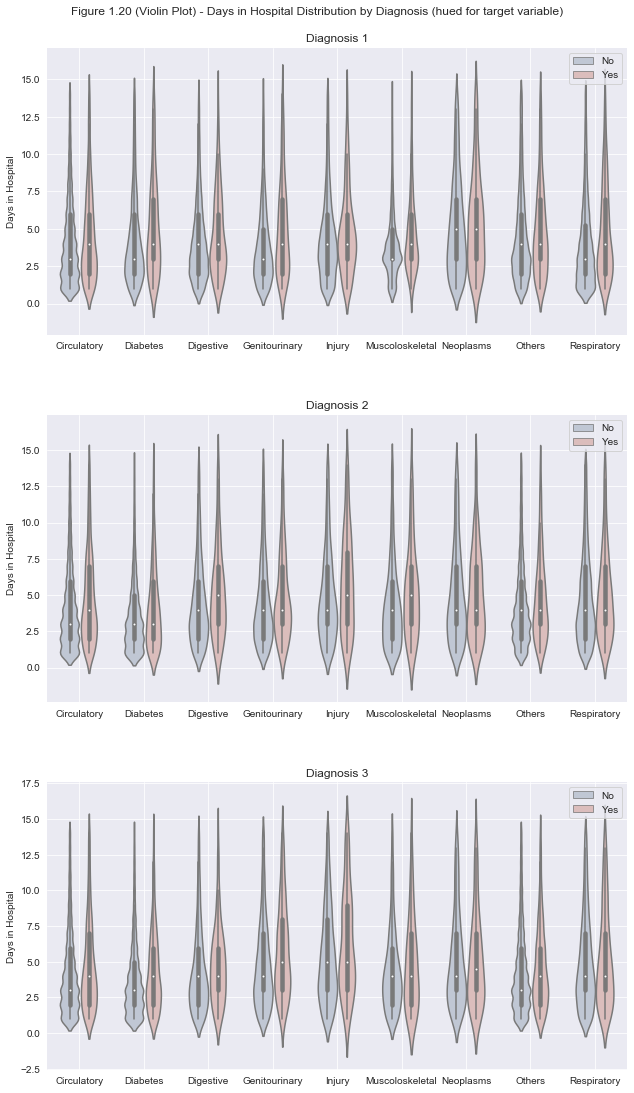

In [49]:
# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(3, 1, figsize = (10, 16),)


#Create Figure by popluating the Axis of the subplot
for i in range(0,3):
    # Plot the orbital period with horizontal boxes
    sns.violinplot(y="time_in_hospital", x="diag_"+str(i+1), data=df,hue = "readmitted",
                whis=[0, 100], width=.6, palette="vlag", ax=ax[i])


    # Tweak the visual presentation
    ax[i].xaxis.grid(True)
    ax[i].set_xlabel("")
    ax[i].legend(loc = "upper right")
    ax[i].set(ylabel="Days in Hospital")
    ax[i].title.set_text("Diagnosis " + str(i+1))
    
    
sns.despine(trim=True, left=True)
fig.suptitle("Figure 1.20 (Violin Plot) - Days in Hospital Distribution by Diagnosis (hued for target variable)")
plt.tight_layout(5)
plt.show()

#### 5.7 Number of Medication Data Distribution vs Readmitted (segmented by Diagnosis)

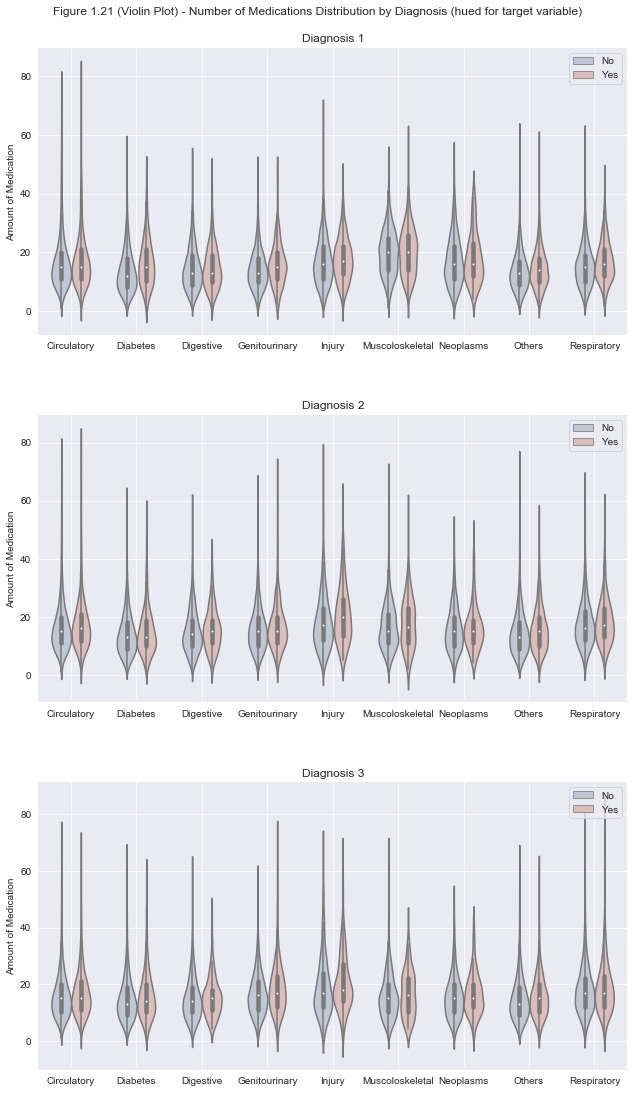

In [50]:
# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(3, 1, figsize = (10, 16),)


#Create Figure by popluating the Axis of the subplot
for i in range(0,3):
    # Plot the orbital period with horizontal boxes
    sns.violinplot(y="num_medications", x="diag_"+str(i+1), data=df,hue = "readmitted",
                whis=[0, 100], width=.6, palette="vlag", ax=ax[i])


    # Tweak the visual presentation
    ax[i].xaxis.grid(True)
    ax[i].set_xlabel("")  
    ax[i].legend(loc = "upper right")
    ax[i].set(ylabel="Amount of Medication")
    ax[i].title.set_text("Diagnosis " + str(i+1))
    
sns.despine(trim=True, left=True)
fig.suptitle("Figure 1.21 (Violin Plot) - Number of Medications Distribution by Diagnosis (hued for target variable)")
plt.tight_layout(5)
plt.show()

#### 5.8 Number of Procedures  Distribution vs Readmitted (segmented by Diagnosis)

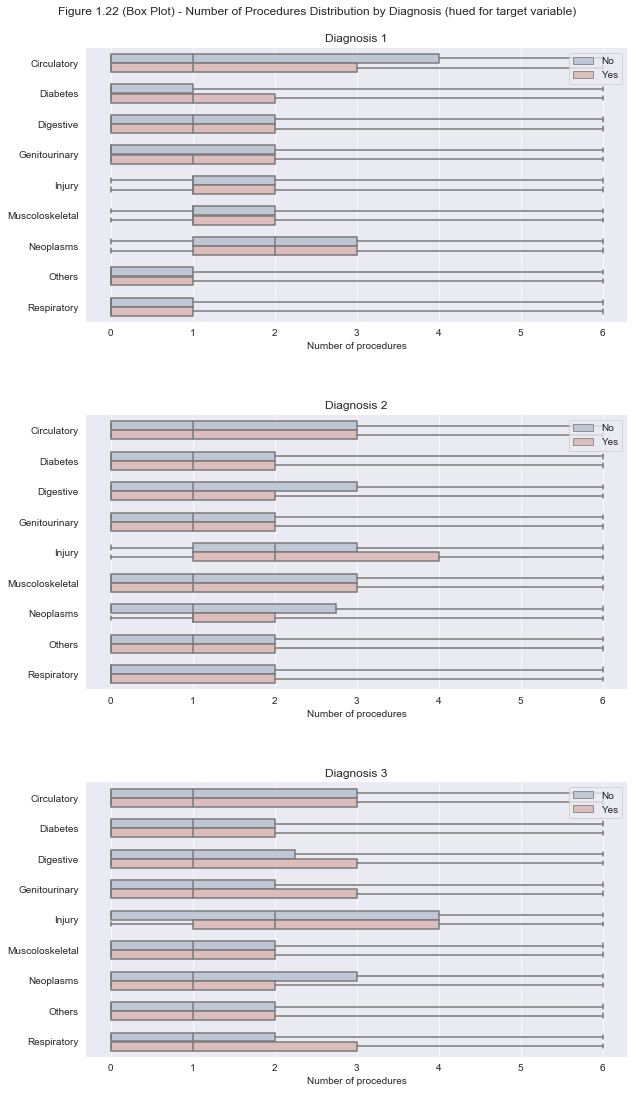

In [51]:
# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(3, 1, figsize = (10, 16))

for i in range(0,3):
    # Plot the orbital period with horizontal boxes
    sns.boxplot(x="num_procedures", y="diag_"+str(i+1), data=df, hue = "readmitted",
                whis=[0, 100], width=.6, palette="vlag", ax=ax[i])

    # Tweak the visual presentation
    ax[i].xaxis.grid(True)
    ax[i].legend(loc = "upper right")
    ax[i].set(ylabel="")
    ax[i].set_xlabel("Number of procedures")
    ax[i].title.set_text("Diagnosis " + str(i+1))

sns.despine(trim=True, left=True)
fig.suptitle("Figure 1.22 (Box Plot) - Number of Procedures Distribution by Diagnosis (hued for target variable)")
plt.tight_layout(5)
plt.show()

#### 5.9 Number of Laboratory Procedures Distribution vs Readmitted (segmented by Diagnosis)

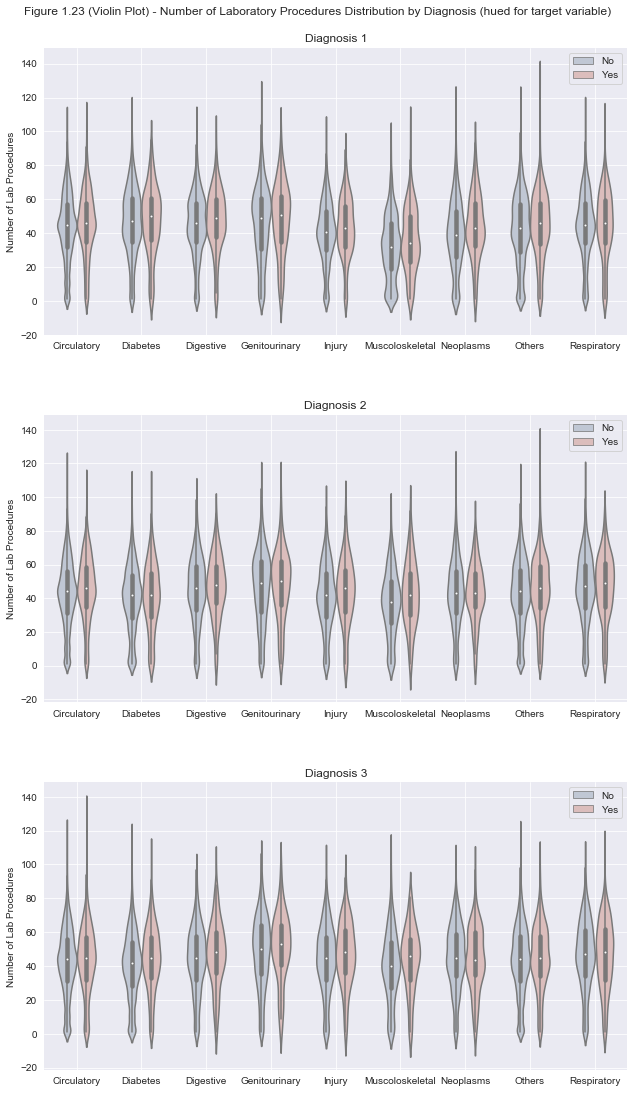

In [52]:
# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(3, 1, figsize = (10, 16),)


#Create Figure by popluating the Axis of the subplot
for i in range(0,3):
    # Plot the orbital period with horizontal boxes
    sns.violinplot(y="num_lab_procedures", x="diag_"+str(i+1), data=df,hue = "readmitted",
                whis=[0, 100], width=.6, palette="vlag", ax=ax[i])


    # Tweak the visual presentation
    ax[i].xaxis.grid(True)
    ax[i].set_xlabel("")  
    ax[i].legend(loc = "upper right")
    ax[i].set(ylabel="Number of Lab Procedures")
    ax[i].title.set_text("Diagnosis " + str(i+1))
    
sns.despine(trim=True, left=True)
fig.suptitle("Figure 1.23 (Violin Plot) - Number of Laboratory Procedures Distribution by Diagnosis (hued for target variable)")
plt.tight_layout(5)
plt.show()

#### 5.10 Number of Diagnoses vs Readmitted (segmented by Diagnosis)

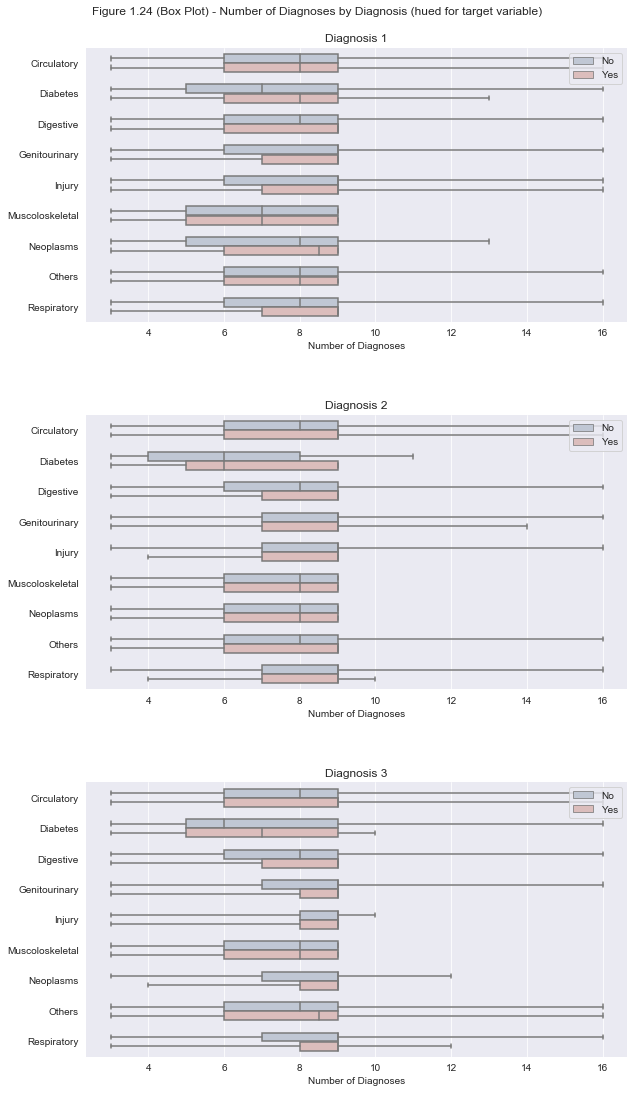

In [53]:
# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(3, 1, figsize = (10, 16))



for i in range(0,3):
    # Plot the orbital period with horizontal boxes
    sns.boxplot(x="number_diagnoses", y="diag_"+str(i+1), data=df, hue = "readmitted",
                whis=[0, 100], width=.6, palette="vlag", ax=ax[i])

    # Tweak the visual presentation
    ax[i].xaxis.grid(True)
    ax[i].legend(loc = "upper right")
    ax[i].set(ylabel="")
    ax[i].set_xlabel("Number of Diagnoses")
    ax[i].title.set_text("Diagnosis " + str(i+1))

sns.despine(trim=True, left=True)
fig.suptitle("Figure 1.24 (Box Plot) - Number of Diagnoses by Diagnosis (hued for target variable)")
plt.tight_layout(5)
plt.show()

#### 5.11 Age Brackets - Segmented Analysis

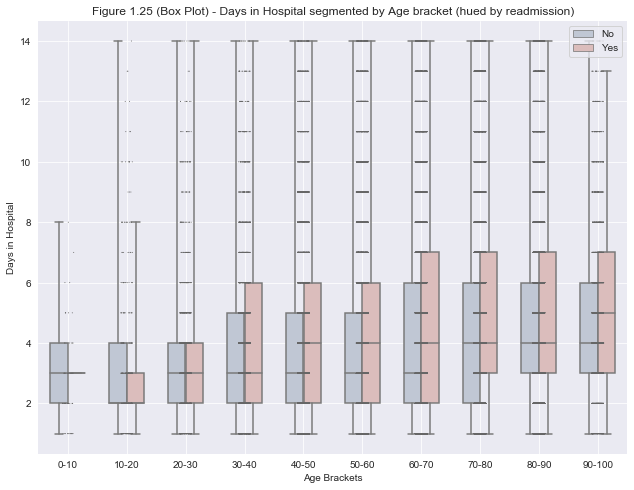

In [54]:
# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(figsize = (10, 8))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="age", y="time_in_hospital", data=df, hue = "readmitted",
                whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="age", y="time_in_hospital", data=df,
              size=1, color=".4", linewidth=0)


ax.xaxis.grid(True)
ax.legend(loc = "upper right")
ax.set(ylabel="Days in Hospital")
ax.set_xlabel("Age Brackets")


sns.despine(trim=True, left=True)
plt.title("Figure 1.25 (Box Plot) - Days in Hospital segmented by Age bracket (hued by readmission)")
plt.tight_layout(5)
plt.show()

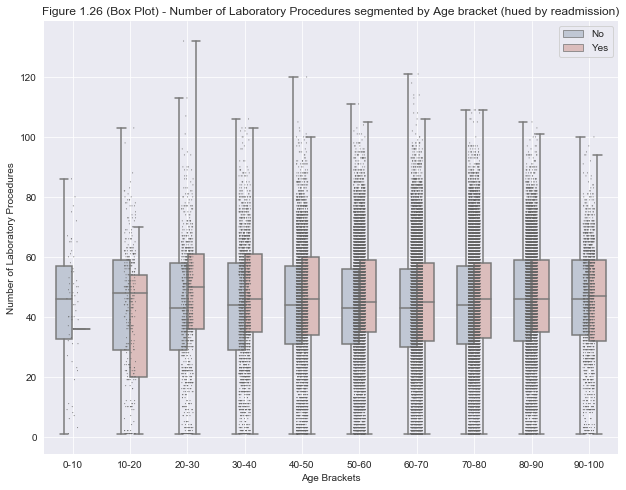

In [55]:
# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(figsize = (10, 8))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="age", y="num_lab_procedures", data=df, hue = "readmitted",
                whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="age", y="num_lab_procedures", data=df,
              size=1, color=".4", linewidth=0)

#Set Figure Layout
ax.xaxis.grid(True)
ax.legend(loc = "upper right")
ax.set(ylabel="Number of Laboratory Procedures")
ax.set_xlabel("Age Brackets")


sns.despine(trim=True, left=True)
plt.title("Figure 1.26 (Box Plot) - Number of Laboratory Procedures segmented by Age bracket (hued by readmission)")
plt.tight_layout(5)
plt.show()

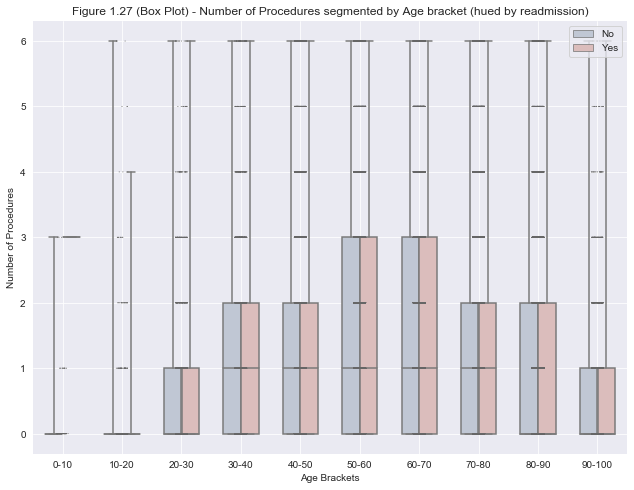

In [56]:
# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(figsize = (10, 8))

sns.boxplot(x="age", y="num_procedures", data=df, hue = "readmitted",
                whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="age", y="num_procedures", data=df,
              size=1, color=".4", linewidth=0)

ax.xaxis.grid(True)
ax.legend(loc = "upper right")
ax.set(ylabel="Number of Procedures")
ax.set_xlabel("Age Brackets")


sns.despine(trim=True, left=True)
plt.title("Figure 1.27 (Box Plot) - Number of Procedures segmented by Age bracket (hued by readmission)")
plt.tight_layout(5)
plt.show()

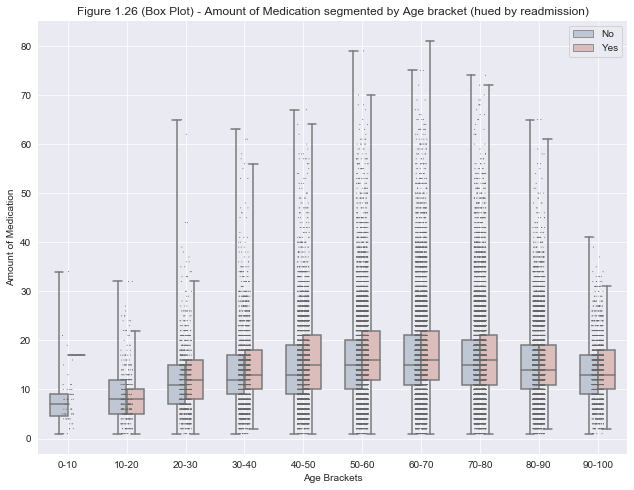

In [57]:
# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(figsize = (10, 8))

sns.boxplot(x="age", y="num_medications", data=df, hue = "readmitted",
                whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="age", y="num_medications", data=df,
              size=1, color=".4", linewidth=0)

ax.xaxis.grid(True)
ax.legend(loc = "upper right")
ax.set(ylabel="Amount of Medication")
ax.set_xlabel("Age Brackets")


sns.despine(trim=True, left=True)
plt.title("Figure 1.26 (Box Plot) - Amount of Medication segmented by Age bracket (hued by readmission)")
plt.tight_layout(5)
plt.show()

#### 5.12 Test Results Analysis

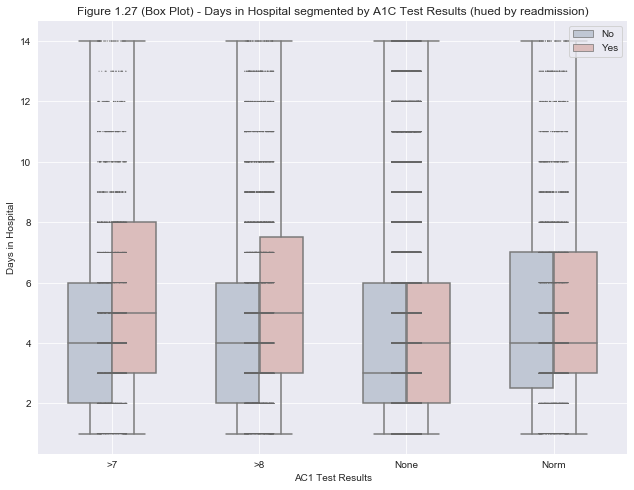

In [58]:
# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(figsize = (10, 8))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="A1Cresult", y="time_in_hospital", data=df, hue = "readmitted",
                whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="A1Cresult", y="time_in_hospital", data=df,
              size=1, color=".4", linewidth=0)


ax.xaxis.grid(True)
ax.legend(loc = "upper right")
ax.set(ylabel="Days in Hospital")
ax.set_xlabel("AC1 Test Results")


sns.despine(trim=True, left=True)
plt.title("Figure 1.27 (Box Plot) - Days in Hospital segmented by A1C Test Results (hued by readmission)")
plt.tight_layout(5)
plt.show()

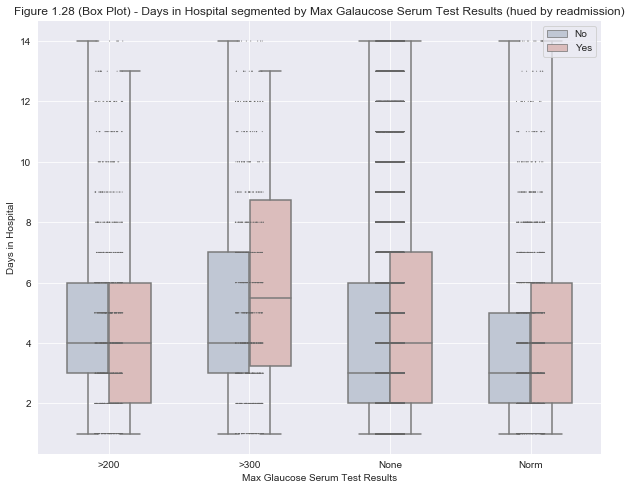

In [59]:
# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(figsize = (10, 8))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="max_glu_serum", y="time_in_hospital", data=df, hue = "readmitted",
                whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="max_glu_serum", y="time_in_hospital", data=df,
              size=1, color=".4", linewidth=0)


ax.xaxis.grid(True)
ax.legend(loc = "upper right")
ax.set(ylabel="Days in Hospital")
ax.set_xlabel("Max Glaucose Serum Test Results")


sns.despine(trim=True, left=True)
plt.title("Figure 1.28 (Box Plot) - Days in Hospital segmented by Max Galaucose Serum Test Results (hued by readmission)")
plt.tight_layout(5)
plt.show()

# 6. Model Engineering

Firstly, let us convert the categorical variables into their respective category encoding. We decided not to normalise the data given that we would lose vasts amount of information mostly due to the high number of categoricl variables and dummies

In [155]:
#Helper function to quickly understand model output on training, test, and out of the bag score.

def print_score(m):
    res = {"Training Set Accuracy Score:": round(accuracy_score(m.predict(X_train), y_train),4), \
           "Test Set Accuracy Score:": round(accuracy_score(m.predict(X_test), y_test),4)}
    
    if hasattr(m, 'oob_score'): 
        res = {"Training Set Accuracy Score:": round(accuracy_score(m.predict(X_train), y_train),4), \
           "Test Set Accuracy Score:": round(accuracy_score(m.predict(X_test), y_test),4), \
              "Out of the bag Score: ": round(m.oob_score_, 4)}
        
    return res

In [61]:
display_all(df.dtypes)

gender                             category
age                                category
time_in_hospital                      int64
num_lab_procedures                    int64
num_procedures                        int64
num_medications                       int64
number_outpatient                     int64
number_emergency                      int64
number_inpatient                      int64
diag_1                             category
diag_2                             category
diag_3                             category
number_diagnoses                      int64
max_glu_serum                      category
A1Cresult                          category
change                             category
diabetesMed                        category
readmitted                         category
med_changes                           int64
metformin_Down                        uint8
metformin_No                          uint8
metformin_Steady                      uint8
metformin_Up                    

In [62]:
cat_cols = list(df.select_dtypes('category').columns)

for col in cat_cols:
    df[col] = df[col].cat.codes

In [63]:
display_all(df)

gender  age  time_in_hospital  num_lab_procedures  num_procedures  \
1            0    1                 3                  59               0   
2            0    2                 2                  11               5   
3            1    3                 2                  44               1   
4            1    4                 1                  51               0   
5            1    5                 3                  31               6   
...        ...  ...               ...                 ...             ...   
101754       0    7                 9                  50               2   
101755       0    4                14                  73               6   
101756       0    6                 2                  46               6   
101758       0    8                 5                  76               1   
101765       1    7                 6                  13               3   

        num_medications  number_outpatient  number_emergency  \
1                    18                  0                 0   
2                    13                  2                 0   
3                    16                  0                 0   
4                     8                  0                 0   
5                    16                  0                 0   
...                 ...                ...               ...   
101754               33                  0                 0   
101755               26                  0                 1   
101756               17                  1                 1   
101758               22                  0                 1   
101765                3                  0                 0   

        number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  \
1                      0       7       1       7                 9   
2                      1       7       1       7                 6   
3                      0       7       1       0                 7   
4                      0       6       6       1                 5   
5                      0       0       0       1                 9   
...                  ...     ...     ...     ...               ...   
101754                 0       2       2       1                 9   
101755                 0       3       3       8                 9   
101756                 1       4       3       0                 9   
101758                 0       7       7       7                 9   
101765                 0       2       2       2                 9   

        max_glu_serum  A1Cresult  change  diabetesMed  readmitted  \
1                   2          2       0            1           0   
2                   2          2       1            1           0   
3                   2          2       0            1           0   
4                   2          2       0            1           0   
5                   2          2       1            1           0   
...               ...        ...     ...          ...         ...   
101754              2          0       0            1           0   
101755              2          1       0            1           0   
101756              2          2       1            1           0   
101758              2          2       0            1           0   
101765              2          2       1            0           0   

        med_changes  metformin_Down  metformin_No  metformin_Steady  \
1                 1               0             1                 0   
2                 0               0             1                 0   
3                 1               0             1                 0   
4                 0               0             1                 0   
5                 0               0             1                 0   
...             ...             ...           ...               ...   
101754            1               0             1                 0   
101755            1               0             1                 0   
10175

Secondly, let us separate our dataset into training and test set - we will use a 67% / 33% train-test split. Random state will be set to 0 to allow for replicability of the modelling exercise.

In [156]:
X = df.drop('readmitted',axis=1)
y = df['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((45981, 93), (22648, 93), (45981,), (22648,))

We will use a Random Forest Classifier to estimate our early readmission rate - yet before setteling on the right hyper parameters we will need to run a GridSearch algorythm to understand how to best tune our model. Furthermore, gridsearch has an embedded CrossValidation function, which split the data using Kfold = 5, thus increasing its generalisation power. 

In [65]:
RFC = RandomForestClassifier()
acc_scorer = make_scorer(accuracy_score)

parameters = {'n_estimators': list(range(10,110,10)), \
              "criterion": ["gini", "entropy"],\
              "max_features": ["auto", "sqrt", "log2","auto"], \
              "min_samples_leaf": [1,5,10,50,100], \
              "max_depth" : [5,10,20,None]}

start_time = time.time()
clf = GridSearchCV(RFC, parameters, scoring=acc_scorer)
clf.fit(X_train,y_train)

elapsed_time = time.time() - start_time
msg = "Time elapsed: {:6.2f}".format(elapsed_time)
print(msg)

Time elapsed: 13884.63


In [66]:
results = pd.DataFrame(clf.cv_results_)
display_all(results)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.222433      0.011001         0.016409        0.000959   
1          0.383812      0.027513         0.022608        0.001245   
2          0.540274      0.028762         0.031749        0.003758   
3          0.730405      0.042559         0.039537        0.003602   
4          0.880933      0.050184         0.046614        0.005334   
...             ...           ...              ...             ...   
1595       1.688596      0.067972         0.073036        0.001182   
1596       1.971987      0.047284         0.087376        0.004747   
1597       2.231747      0.033935         0.095961        0.002661   
1598       2.497572      0.035445         0.105530        0.000401   
1599       2.711050      0.032956         0.115088        0.001863   

     param_criterion param_max_depth param_max_features  \
0               gini               5               auto   
1               gini               5               auto   
2               gini               5               auto   
3               gini               5               auto   
4               gini               5               auto   
...              ...             ...                ...   
1595         entropy            None               auto   
1596         entropy            None               auto   
1597         entropy            None               auto   
1598         entropy            None               auto   
1599         entropy            None               auto   

     param_min_samples_leaf param_n_estimators  \
0                         1                 10   
1                         1                 20   
2                         1                 30   
3                         1                 40   
4                         1                 50   
...                     ...                ...   
1595                    100                 60   
1596                    100                 70   
1597                    100                 80   
1598                    100                 90   
1599                    100                100   

                                                 params  split0_test_score  \
0     {'criterion': 'gini', 'max_depth': 5, 'max_fea...           0.910188   
1     {'criterion': 'gini', 'max_depth': 5, 'max_fea...           0.910188   
2     {'criterion': 'gini', 'max_depth': 5, 'max_fea...           0.910188   
3     {'criterion': 'gini', 'max_depth': 5, 'max_fea...           0.910188   
4     {'criterion': 'gini', 'max_depth': 5, 'max_fea...           0.910188   
...                                                 ...                ...   
1595  {'criterion': 'entropy', 'max_depth': None, 'm...           0.910188   
1596  {'criterion': 'entropy', 'max_depth': None, 'm...           0.910188   
1597  {'criterion': 'entropy', 'max_depth': None, 'm...           0.910188   
1598  {'criterion': 'entropy', 'max_depth': None, 'm...           0.910188   
1599  {'criterion': 'entropy', 'max_depth': None, 'm...           0.910188   

      split1_test_score  split2_test_score  split3_test_score  \
0              0.910178           0.910178           0.910178   
1              0.910178           0.910178           0.910178   
2              0.910178           0.910178           0.910178   
3              0.910178           0.910178           0.910178   
4              0.910178           0.910178           0.910178   
...                 ...                ...                ...   
1595           0.910178           0.910178           0.910178   
1596           0.910178           0.910178           0.910178   
1597           0.910178           0.910178           0.910178   
1598           0.910178           0.910178           0.910178   
1599           0.910178           0.910178           0.910178   

      split4_test_score  mean_test_score  std_test_score  rank_test_score  
0              0.910178          0.91018        0.000004     

In [163]:
best_params = results[results["rank_test_score"] == 1]
best_params.sort_values("mean_score_time")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
350       0.336100      0.009699         0.020491        0.001704   
502       1.227878      0.017477         0.077435        0.002693   
554       2.597624      0.131927         0.122258        0.001569   
405       3.058247      0.057122         0.142222        0.001621   
556       3.667891      0.128510         0.168030        0.002305   

    param_criterion param_max_depth param_max_features param_min_samples_leaf  \
350            gini              10               auto                      1   
502            gini              20               log2                      1   
554            gini              20               auto                      1   
405            gini              20               auto                      1   
556            gini              20               auto                      1   

    param_n_estimators                                             params  \
350                 10  {'criterion': 'gini', 'max_depth': 10, 'max_fe...   
502                 30  {'criterion': 'gini', 'max_depth': 20, 'max_fe...   
554                 50  {'criterion': 'gini', 'max_depth': 20, 'max_fe...   
405                 60  {'criterion': 'gini', 'max_depth': 20, 'max_fe...   
556                 70  {'criterion': 'gini', 'max_depth': 20, 'max_fe...   

     split0_test_score  split1_test_score  split2_test_score  \
350           0.910188           0.910287           0.910178   
502           0.910188           0.910178           0.910178   
554           0.910188           0.910178           0.910287   
405           0.910188           0.910178           0.910287   
556           0.910188           0.910178           0.910287   

     split3_test_score  split4_test_score  mean_test_score  std_test_score  \
350           0.910178           0.910178         0.910202        0.000043   
502           0.910178           0.910287         0.910202        0.000043   
554           0.910178           0.910178         0.910202        0.000043   
405           0.910178           0.910178         0.910202        0.000043   
556           0.910178           0.910178         0.910202        0.000043   

     rank_test_score  
350                1  
502                1  
554                1  
405                1  
556                1

In [164]:
best_params = results[results["rank_test_score"] == 1]
best_params = best_params.sort_values("mean_score_time")
cols = ["params", "mean_test_score"]

for col in cols:
    if col == "params":
        for k,v in best_params[col].items():
            print(k,v)
    else:
        print(" ")
        for row in best_params[col]:
            print("Mean Test Score: " + str(round(row,6)))


350 {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}
502 {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 30}
554 {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 50}
405 {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 60}
556 {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 70}
 
Mean Test Score: 0.910202
Mean Test Score: 0.910202
Mean Test Score: 0.910202
Mean Test Score: 0.910202
Mean Test Score: 0.910202


In [157]:
RFC = RandomForestClassifier(oob_score = True)
%time RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print_score(RFC)

CPU times: user 9.08 s, sys: 183 ms, total: 9.26 s
Wall time: 9.28 s


{'Training Set Accuracy Score:': 1.0,
 'Test Set Accuracy Score:': 0.9118,
 'Out of the bag Score: ': 0.91}

In [168]:
RFC = RandomForestClassifier(criterion = 'gini', max_depth = 20, max_features = 'auto', \
                             min_samples_leaf = 1, n_estimators = 50, oob_score = True)
%time RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print_score(RFC)

CPU times: user 2.84 s, sys: 51 ms, total: 2.89 s
Wall time: 2.9 s


{'Training Set Accuracy Score:': 0.95,
 'Test Set Accuracy Score:': 0.9119,
 'Out of the bag Score: ': 0.9098}

We signficiantly reduced overfitting of our model thanks to GridSearch, while mantaining our accuracy score at the same level. Furthermore running time is vividly lower (nearly 2x) and the overall complexity of the model has been signficantly reduced.

Let us know have a more solid look at the model's performance.

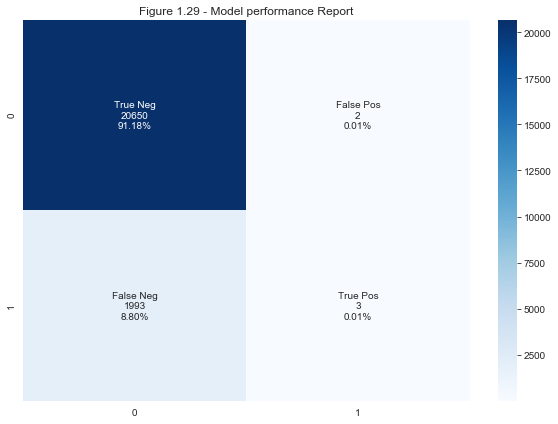

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     20652
           1       0.60      0.00      0.00      1996

    accuracy                           0.91     22648
   macro avg       0.76      0.50      0.48     22648
weighted avg       0.88      0.91      0.87     22648



In [169]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = ["{}\n{}\n{}".format(v1,v2,v3) for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize = (10,7))
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

plt.title("Figure 1.29 - Model performance Report")
plt.show()

print(classification_report(y_test, y_pred))

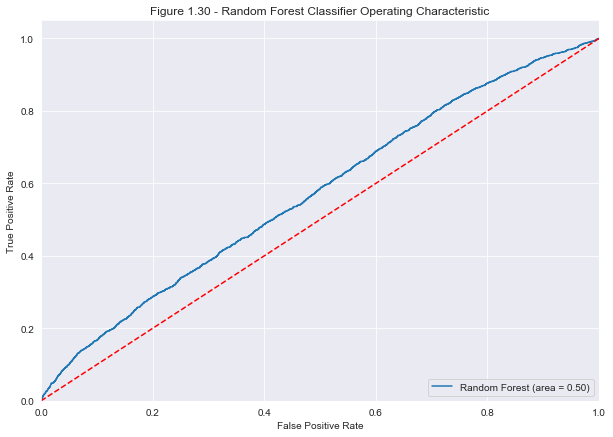

In [171]:
DTs_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, RFC.predict_proba(X_test)[:,1])

fig, ax = plt.subplots(figsize = (10,7))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % DTs_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 1.30 - Random Forest Classifier Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 7. Feature Interpretation

In [97]:
test_row = pd.DataFrame(X_test.loc[1000,:]).T
test_row

gender  age  time_in_hospital  num_lab_procedures  num_procedures  \
1000       1    5                 6                  57               2   

      num_medications  number_outpatient  number_emergency  number_inpatient  \
1000               14                  0                 0                 0   

      diag_1  ...  troglitazone_Steady  tolbutamide_No  tolbutamide_Steady  \
1000       7  ...                    0               1                   0   

      acetohexamide_No  acetohexamide_Steady  AfricanAmerican  Asian  \
1000                 1                     0                0      0   

      Caucasian  Hispanic  Other  
1000          1         0      0  

[1 rows x 93 columns]

### 7.1 LIME 

The LIME explainer is a Local Model Interpreter which include the feature importance for a particular prediction.

This is helpful if you want to findout why the model predicted this way in a particular patient.

In [98]:
#initialization of a explainer from LIME
explainer = LimeTabularExplainer(X_train.values,
                                 mode='classification',
                                 feature_names=X_train.columns,
                                 class_names=['Readmitted','Not Readmitted'])

exp = explainer.explain_instance(test_row.values[0],
                                 RFC.predict_proba,
                                 num_features=X_train.shape[1])

exp.show_in_notebook(show_table=True)

### 7.2 ELI

For the global model interpretation, we can notice that number of patient and diabetes(or not) are the two most positive contributing features. While, the metformin-pioglitazone and other(health diagnosis) are the two most negative contributing features

Local interpretation

In [109]:
eli5.show_prediction(RFC, test_row.values[0],feature_names=list(X_test.columns),top=None)

Global interpretation

In [122]:
fi = pd.DataFrame(X_train.columns, columns = ["Feature"])
fi["score"] = RFC.feature_importances_
fi["score"] = fi["score"].astype(float).round(5)

In [123]:
display_all(fi.sort_values("score", ascending = False))

Feature    score
3                num_lab_procedures  0.11400
5                   num_medications  0.10119
2                  time_in_hospital  0.07230
1                               age  0.06025
9                            diag_1  0.05620
11                           diag_3  0.05597
10                           diag_2  0.05377
12                 number_diagnoses  0.05191
4                    num_procedures  0.05134
8                  number_inpatient  0.04268
6                 number_outpatient  0.02768
14                        A1Cresult  0.02486
0                            gender  0.02364
7                  number_emergency  0.02147
13                    max_glu_serum  0.01423
90                        Caucasian  0.01339
88                  AfricanAmerican  0.01188
17                      med_changes  0.01187
66                   insulin_Steady  0.01175
65                       insulin_No  0.01146
15                           change  0.01074
19                     metformin_No  0.01004
20                 metformin_Steady  0.00946
41                     glipizide_No  0.00927
42                 glipizide_Steady  0.00896
53                 rosiglitazone_No  0.00744
50              pioglitazone_Steady  0.00733
45                     glyburide_No  0.00733
49                  pioglitazone_No  0.00724
46                 glyburide_Steady  0.00721
64                     insulin_Down  0.00718
67                       insulin_Up  0.00683
54             rosiglitazone_Steady  0.00682
16                      diabetesMed  0.00565
37                   glimepiride_No  0.00513
38               glimepiride_Steady  0.00504
91                         Hispanic  0.00500
92                            Other  0.00395
23                   repaglinide_No  0.00304
24               repaglinide_Steady  0.00304
47                     glyburide_Up  0.00267
89                            Asian  0.00267
40                   glipizide_Down  0.00243
43                     glipizide_Up  0.00223
21                     metformin_Up  0.00220
18                   metformin_Down  0.00185
28               nateglinide_Steady  0.00176
27                   nateglinide_No  0.00157
36                 glimepiride_Down  0.00154
44                   glyburide_Down  0.00147
69           glyburide-metformin_No  0.00146
51                  pioglitazone_Up  0.00141
70       glyburide-metformin_Steady  0.00132
58                  acarbose_Steady  0.00111
57                      acarbose_No  0.00102
39                   glimepiride_Up  0.00096
55                 rosiglitazone_Up  0.00087
25                   repaglinide_Up  0.00084
48                pioglitazone_Down  0.00043
52               rosiglitazone_Down  0.00036
31                chlorpropamide_No  0.00034
59                      acarbose_Up  0.00024
32            chlorpropamide_Steady  0.00023
22                 repaglinide_Down  0.00018
61                      miglitol_No  0.00012
62                  miglitol_Steady  0.00010
73                tolazamide_Steady  0.00003
29                   nateglinide_Up  0.00002
72                    tolazamide_No  0.00002
80           glipizide-metformin_No  0.00002
87             acetohexamide_Steady  0.00001
84                   tolbutamide_No  0.00001
63                      miglitol_Up  0.00000
81       glipizide-metformin_Steady  0.00000
33                chlorpropamide_Up  0.00000
34                   citoglipton_No  0.00000
35                       examide_No  0.00000
86                 acetohexamide_No  0.00000
85               tolbutamide_Steady  0.00000
83              troglitazone_Steady  0.00000
82                  troglitazone_No  0.00000
79  glimepiride-pioglitazone_Steady  0.00000
78      glimepiride-pioglitazone_No  0.00000
77       metformin-rosiglitazone_No  0.00000
76    metformin-pioglitazone_Steady  0.00000
75        metformin-pioglitazone_No  0.00000
74                    tolazamide_Up  0.00000
71           glyburide-metformin_Up  0.00000
26                 nate

In [113]:
eli5.show_weights(RFC, feature_names = list(X_test.columns),top=None)

In [131]:
important_features = fi[fi["score"]> 0.01].sort_values("score", ascending = False)
important_features

Feature    score
3   num_lab_procedures  0.11400
5      num_medications  0.10119
2     time_in_hospital  0.07230
1                  age  0.06025
9               diag_1  0.05620
11              diag_3  0.05597
10              diag_2  0.05377
12    number_diagnoses  0.05191
4       num_procedures  0.05134
8     number_inpatient  0.04268
6    number_outpatient  0.02768
14           A1Cresult  0.02486
0               gender  0.02364
7     number_emergency  0.02147
13       max_glu_serum  0.01423
90           Caucasian  0.01339
88     AfricanAmerican  0.01188
17         med_changes  0.01187
66      insulin_Steady  0.01175
65          insulin_No  0.01146
15              change  0.01074
19        metformin_No  0.01004

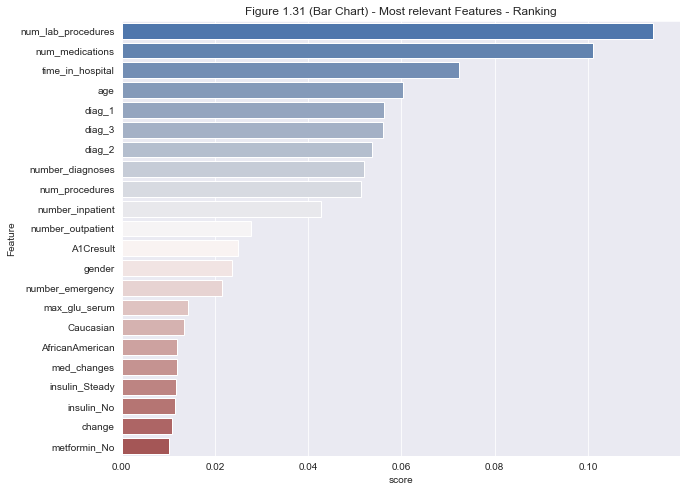

In [133]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(data = important_features, x = "score", y = "Feature", palette="vlag")
plt.title("Figure 1.31 (Bar Chart) - Most relevant Features - Ranking")
plt.show()

In [110]:
eli5.show_weights(RFC, feature_names = list(X_test.columns),top=None)

### 7.3 SHAP 

In [111]:
explainer = TreeExplainer(RFC)
shap_values = explainer.shap_values(test_row.values)
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                test_row.values,
                feature_names=X_test.columns)

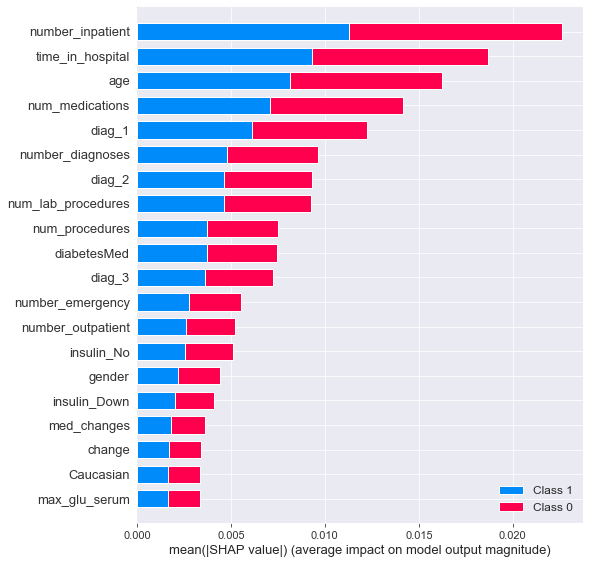

In [112]:
shap_values = explainer.shap_values(X_train.values)
spplot = shap.summary_plot(shap_values, X_train.values, feature_names=X_train.columns)

On the back of our feature analysis we see that many features have little to no direct impact on our model's prediction. 
We will try to see whether excluding these features from the model will yield any signficant improvement, while keeping both the overfitting and generalisation score in mind. 

In [141]:
shap_features = ["number_inpatient", "time_in_hospital", "age", "num_medications",\
 "diag_1","number_diagnoses", "diag_2", "num_lab_procedures", \
 "num_procedures", "diabetesMed", "diag_3", "number_emergency", "number_outpatient", \
"insulin_No", "gender", "insulin_Down", "med_changes", "change", "Caucasian", "max_glu_serum", \
"readmitted"]

Let us firstly try training the model with the most relevant features captured by our shap interpretation

In [159]:
df_keep = df[shap_features]

X = df_keep.drop('readmitted',axis=1)
y = df_keep['readmitted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((45981, 20), (22648, 20), (45981,), (22648,))

In [160]:
RFC = RandomForestClassifier(criterion = 'gini', max_depth = 20, max_features = 'auto', \
                             min_samples_leaf = 1, n_estimators = 50, oob_score = True)
%time RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print_score(RFC)

CPU times: user 3.18 s, sys: 61.1 ms, total: 3.24 s
Wall time: 3.29 s


{'Training Set Accuracy Score:': 0.9544,
 'Test Set Accuracy Score:': 0.9119,
 'Out of the bag Score: ': 0.9095}

We see that the model tends to slightly overfit the Training data, while performing the same on the Test data - suggesting that it might not be the best practice to do so in this instance.

Let us know see if a slightly broader list of important features yields any signficant change.

In [161]:
important_features_lst = list(important_features["Feature"])
important_features_lst.append("readmitted")

df_keep_2 = df[important_features_lst]

X = df_keep_2.drop('readmitted',axis=1)
y = df_keep_2['readmitted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((45981, 22), (22648, 22), (45981,), (22648,))

In [162]:
RFC = RandomForestClassifier(criterion = 'gini', max_depth = 20, max_features = 'auto', \
                             min_samples_leaf = 1, n_estimators = 50, oob_score = True)

%time RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print_score(RFC)

CPU times: user 3.3 s, sys: 76.2 ms, total: 3.37 s
Wall time: 3.75 s


{'Training Set Accuracy Score:': 0.9507,
 'Test Set Accuracy Score:': 0.9118,
 'Out of the bag Score: ': 0.9099}

Again we notice that the issue of overfitting persists if we narrow down the features used to train the model - thus we decide to keep all features we presented and propose the earlier-presented model as our final choice.